In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def get_intersections(x1,y1,R1,x2,y2,R2):
    d = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    
    if d > R1+R2:
        return None
    elif d < np.abs(R2-R1):
        return None
    elif d == 0 and R1 == R2:
        return None
    elif d <= R1 + R2:
        
        a = (R1**2 - R2**2 + d**2)/(2*d)
        
        x3 = x1 + a *(x2-x1)/d
        y3 = y1 + a *(y2-y1)/d

        h = np.sqrt(R1**2 - a**2)

        p1x = x3 + h * (y2-y1)/d
        p1y = y3 - h * (x2-x1)/d
        
        p2x = x3 - h * (y2-y1)/d
        p2y = y3 + h * (x2-x1)/d

        return p1x,p1y,p2x,p2y

def get_tagDistance(tagx,tagy,readerx,readery):
    distance = np.sqrt((tagx-readerx)**2 + (tagy-readery)**2)
    return distance

def get_phase(distance,lamda):
    phase = (distance * 4 * np.pi)/lamda
    return phase

def phase_measured(distance,lamda):
    phase = get_phase(distance,lamda)
    return phase%(2*np.pi)

def reader_circumferences(phase_measured,Rmax,lamda):
    dist = 0
    radii = []
    n = 0
    while(dist < Rmax):
        r = lamda*n/2 + (lamda*phase_measured)/(4*np.pi)
        radii.append(r)
        dist = r
        n +=1
    return radii

def circumferences_interceptions(radiia,radiib,readera,readerb):
    points = []
    for r1 in radiia:
        for r2 in radiib:
            intersections = get_intersections(readera[0], readera[1], r1, readerb[0], readerb[1], r2)
            if intersections is not None:
                p1x,p1y,p2x,p2y = intersections
                P1 = (round(p1x,3),round(p1y,3))
                P2 = (round(p2x,3),round(p2y,3)) 

                if P1 not in points:
                    points.append(P1)
                if P2 not in points:
                    points.append(P2)
    return points

def plot_point_cloud(tag,readers,radii,points_clouds,plot_circumferences = True,window = (-100,100),plot_tag=True):
    
    fig, ax = plt.subplots(figsize=(12,12)) 
    ax.grid(True)
    ax.set_xlim(window)
    ax.set_ylim(window)
    
    if plot_circumferences == True:
        for i,reader in enumerate(readers):
            circles = []
            for r in radii[i]:
                circles.append(plt.Circle((reader[0],reader[1]), r, color='slategrey', fill=False))
            for circle in circles:
                ax.add_artist(circle)

    if plot_tag == True:
        ax.plot(tag[0],tag[1],'s', color = 'dodgerblue',markersize=10)

    for points_cloud in points_clouds:
        for point in points_cloud:
            plt.plot(point[0],point[1],'.', color='r')
    for reader in readers:
        ax.plot(reader[0],reader[1],'kd',markersize=10)


    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    
def get_measurment(phase_measured):
    phase_noisy = phase_measured + 0.1*np.random.normal(0,1)
    return phase_noisy

In [16]:
reader1 = 30,10
reader2 = -35,0
reader3 = -20,25
reader4 = 0,-20
readers = reader1,reader2,reader3#,reader4
tag = 0,0
NOISE = True

Rmax = 70
lamda= 20

distance1 = get_tagDistance(*tag,*reader1)
distance2 = get_tagDistance(*tag,*reader2)
distance3 = get_tagDistance(*tag,*reader3)
distance4 = get_tagDistance(*tag,*reader4)

phase_measured1 = phase_measured(distance1,lamda)
phase_measured2 = phase_measured(distance2,lamda)
phase_measured3 = phase_measured(distance3,lamda)
phase_measured4 = phase_measured(distance4,lamda)

if NOISE == True:
    phase_measured1 = get_measurment(phase_measured1)
    phase_measured2 = get_measurment(phase_measured2)
    phase_measured3 = get_measurment(phase_measured3)
    phase_measured4 = get_measurment(phase_measured4)


radii1 = reader_circumferences(phase_measured1,Rmax,lamda)
radii2 = reader_circumferences(phase_measured2,Rmax,lamda)
radii3 = reader_circumferences(phase_measured3,Rmax,lamda)
radii4 = reader_circumferences(phase_measured4,Rmax,lamda)
radii = radii1,radii2,radii3,#radii4

 
points_cloud1 = circumferences_interceptions(radii1,radii2,reader1,reader2)
points_cloud2 = circumferences_interceptions(radii1,radii3,reader1,reader3)
points_cloud3 = circumferences_interceptions(radii2,radii3,reader2,reader3)
points_cloud4 = circumferences_interceptions(radii1,radii4,reader1,reader4)
clouds = points_cloud1,points_cloud2,points_cloud3#,points_cloud4


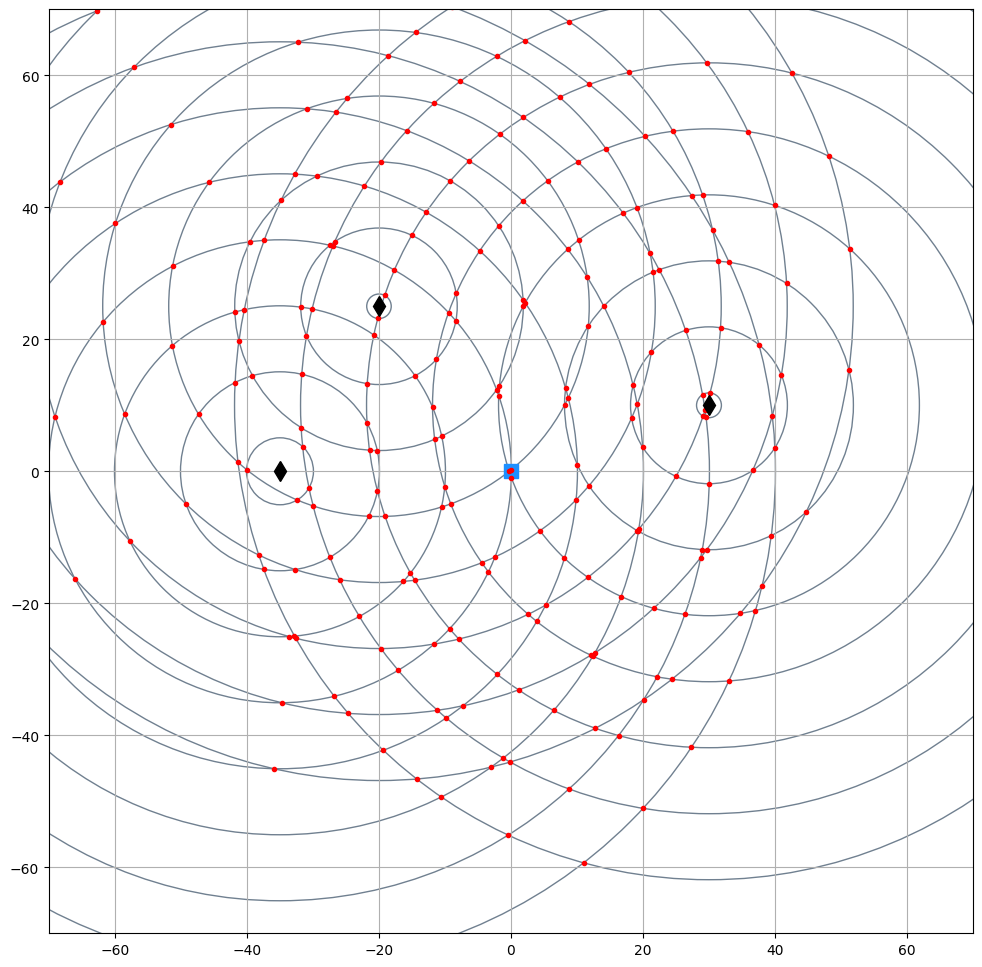

In [22]:
plot_point_cloud(tag,readers,radii,clouds,plot_circumferences=True,window=(-70,70),plot_tag=True)

In [18]:
set(points_cloud1) & set(points_cloud2) & set(points_cloud3)

set()